In [1]:
import os 
import glob

import numpy as np
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
palette = [
    '#388E3C',  # baard
    '#b166d0',  # magnet
    '#2196f3',  # rc
    '#F9A825',  # lid
    '#ff1744',  # fs
]

name_nicely = {
    "banknote": "Banknote",
    "breastcancer": "BrCancer",
    "cifar10": "CIFAR-10",
    "htru2": "HTRU2",
    "mnist": "MNIST",
    "dnn": "DNN",
    "resnet": "ResNet",
    "svm": "SVM",
    "tree": "Tree",
    "vgg": "VGG",
    "baard": "BAARD",
    "fs": "FS",
    "lid": "LID",
    "magnet": "MagNet",
    "rc": "RC"
}

In [3]:
def read_baard_results(data, model, attacks):
    list_df = []
    for i in range(5):
        for a in attacks:
            path = os.path.join(
                '..','results', 'result_{}'.format(i), '{}_{}'.format(data, model), 'results', 
                '{}_{}_{}_baard.csv'.format(data, model, a))
            df = pd.read_csv(path)
            df = df.drop('Unnamed: 0', axis=1)
            list_df.append(df)
    df = pd.concat(list_df, axis=0, ignore_index=True)
    df = df.rename(columns={
        'acc_on_adv_3': 'acc_on_adv',
        'fpr_3': 'fpr'
    })
    df['defence'] = 'baard'
    return df[['data', 'model', 'attack', 'adv_param', 'defence', 'acc_no_def', 'acc_on_adv', 'fpr']]

In [4]:
def merge_results(data, model, attacks, defences):
    list_df = []
    for i in range(5):
        for a in attacks:
            for d in defences:
                p_mnist_dnn_apgd2_baard = os.path.join(
                    '..', 'results', 'result_{}'.format(i), '{}_{}'.format(data, model), 'results', 
                    '{}_{}_{}_{}.csv'.format(data, model, a, d))
                df = pd.read_csv(p_mnist_dnn_apgd2_baard)
                df = df.drop('Unnamed: 0', axis=1)
                df['defence'] = d
                list_df.append(df)
    df = pd.concat(list_df, axis=0, ignore_index=True)
    return df

In [5]:
attacks = ['fgsm', 'apgd', 'apgd2', 'cw2']
defences = ['fs', 'lid', 'magnet', 'rc']

df = read_baard_results('mnist', 'dnn', attacks)
df = df.append(merge_results('mnist', 'dnn', attacks, defences))

df = df.append(read_baard_results('cifar10', 'resnet', attacks))
df = df.append(merge_results('cifar10', 'resnet', attacks, defences))

In [6]:
df['data'] = df['data'].map(name_nicely)
df['model'] = df['model'].map(name_nicely)
df['defence'] = df['defence'].map(name_nicely)

In [7]:
df

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr
0,MNIST,DNN,fgsm,0.063,BAARD,0.889,1.000,0.032
1,MNIST,DNN,fgsm,0.100,BAARD,0.628,1.000,0.032
2,MNIST,DNN,fgsm,0.300,BAARD,0.069,1.000,0.032
3,MNIST,DNN,fgsm,0.600,BAARD,0.005,1.000,0.032
4,MNIST,DNN,fgsm,1.000,BAARD,0.005,1.000,0.032
...,...,...,...,...,...,...,...,...
455,CIFAR-10,ResNet,cw2,5.000,MagNet,0.000,0.204,0.002
456,CIFAR-10,ResNet,cw2,10.000,MagNet,0.000,0.314,0.002
457,CIFAR-10,ResNet,cw2,0.000,RC,0.000,0.900,0.002
458,CIFAR-10,ResNet,cw2,5.000,RC,0.000,0.000,0.002


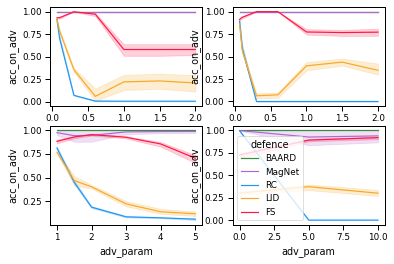

In [28]:
cols = ['data', 'model', 'attack', 'adv_param', 'defence', 'acc_no_def', 
    'acc_on_adv']
hue_order = ['BAARD', 'MagNet', 'RC', 'LID', 'FS']

sns.set_context('paper')
fig, axs = plt.subplots(2, 2, figsize=(6, 4))
axs = axs.flatten()

for i, att in enumerate(attacks):
    df_by_att = df[(df['attack'] == att) & (df['data'] == 'MNIST')]
    s = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence',
        palette=palette, data=df_by_att, hue_order=hue_order, ax=axs[i])

for i in range(3):
    axs[i].legend_.remove()


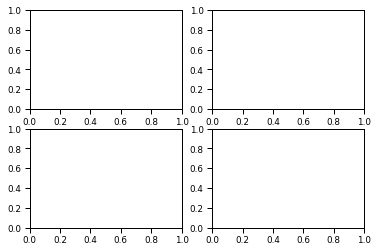

In [30]:
cols = ['data', 'model', 'attack', 'adv_param', 'defence', 'acc_no_def', 
    'acc_on_adv']
hue_order = ['BAARD', 'MagNet', 'RC', 'LID', 'FS']

sns.set_context('paper')
fig, axs = plt.subplots(2, 2, figsize=(6, 4))
axs = axs.flatten()

for i, att in enumerate(attacks):
    df_by_att = df[(df['attack'] == att) & (df['data'] == 'CIFAR10') & (df['model'] == 'ResNet')]
    s = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence',
        palette=palette, data=df_by_att, hue_order=hue_order, ax=axs[i])

# for i in range(3):
#     axs[i].legend_.remove()